In [1]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tf.__version__

'2.2.0'

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open("/content/drive/My Drive/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [0]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

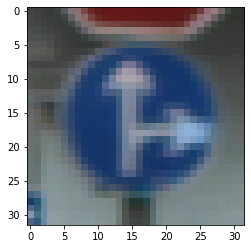

In [10]:
plt.imshow(X_train[1100])

In [11]:
y_train[1100]

36

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
X_test.shape

(12630, 32, 32, 3)

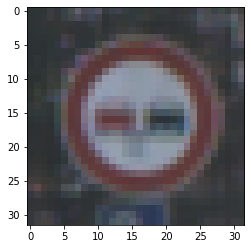

In [18]:
i = random.randint(1,len(X_train)) 

plt.imshow( X_train[i] , cmap = 'gray')

In [19]:
label = y_train[i]
label

9

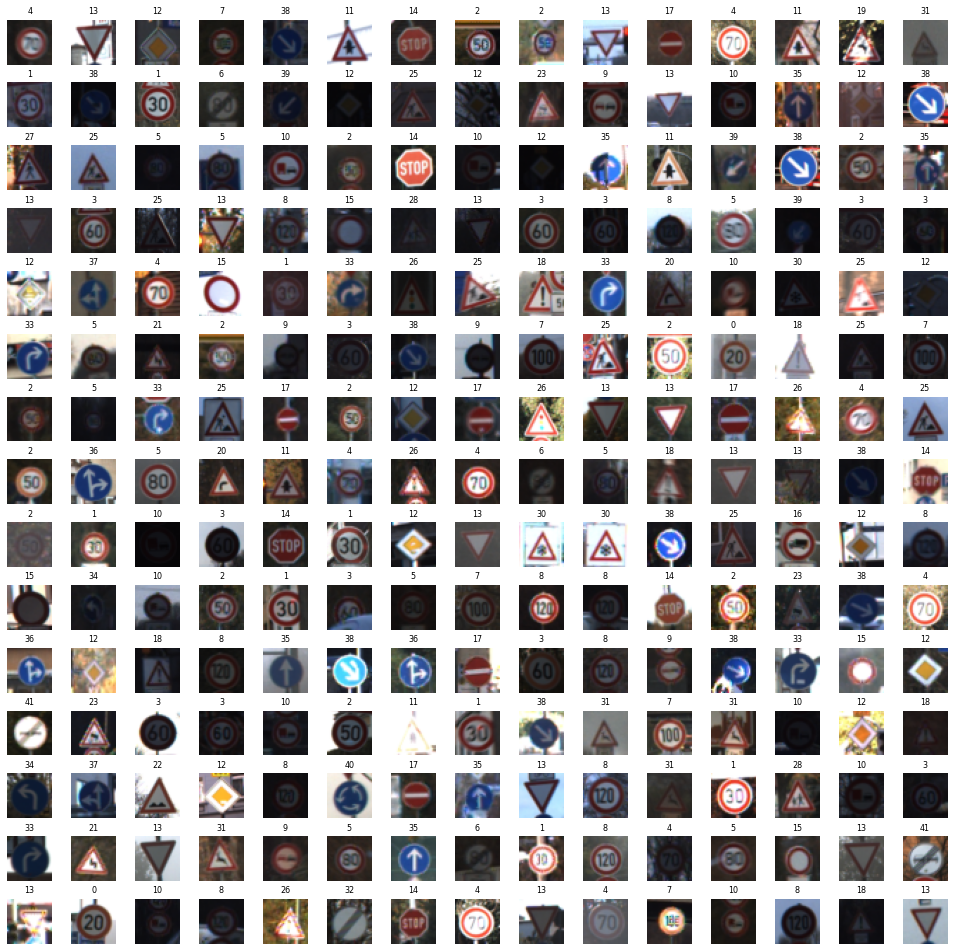

In [20]:
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) # Encoded image (Code Layer)


# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [23]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0

In [24]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=200, 
          validation_data=(X_test, X_test))

Epoch 1/20
174/174 [==============================] - 5s 30ms/step - loss: 0.5070 - val_loss: 0.5265
Epoch 2/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4861 - val_loss: 0.4977
Epoch 3/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4821 - val_loss: 0.4855
Epoch 4/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4796 - val_loss: 0.4769
Epoch 5/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4773 - val_loss: 0.4754
Epoch 6/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4761 - val_loss: 0.4739
Epoch 7/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4746 - val_loss: 0.4767
Epoch 8/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4732 - val_loss: 0.4768
Epoch 9/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4726 - val_loss: 0.4760
Epoch 10/20
174/174 [==============================] - 5s 27ms/step - loss: 0.4714 - val_lo

In [0]:
predicted = autoencoder.predict(X_test[0:1])

In [37]:
predicted.shape

(1, 32, 32, 3)

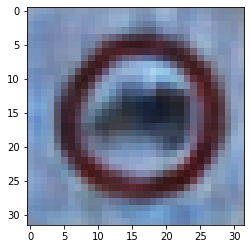

In [46]:
for i in predicted:
  plt.imshow(i)

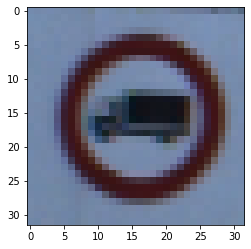

In [50]:
plt.imshow(X_test[0])